In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/mohittomar2008/Rainfall-Prediction---Weather-Forecasting/main/weatherAUS.csv")

In [3]:
# Top 5 records
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
print("Dataset have \nRows-",df.shape[0],'\nColumns -',df.shape[1])

Dataset have 
Rows- 8425 
Columns - 23


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


In [8]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [9]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Sunshine         47.41
Evaporation      41.69
Cloud3pm         29.14
Cloud9am         28.74
Pressure3pm      15.57
Pressure9am      15.54
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
RainToday         2.85
Rainfall          2.85
RainTomorrow      2.84
WindSpeed3pm      1.27
Humidity3pm       1.21
Temp3pm           1.14
WindSpeed9am      0.90
MinTemp           0.89
MaxTemp           0.71
Humidity9am       0.70
Temp9am           0.66
Location          0.00
Date              0.00
dtype: float64

<Axes: >

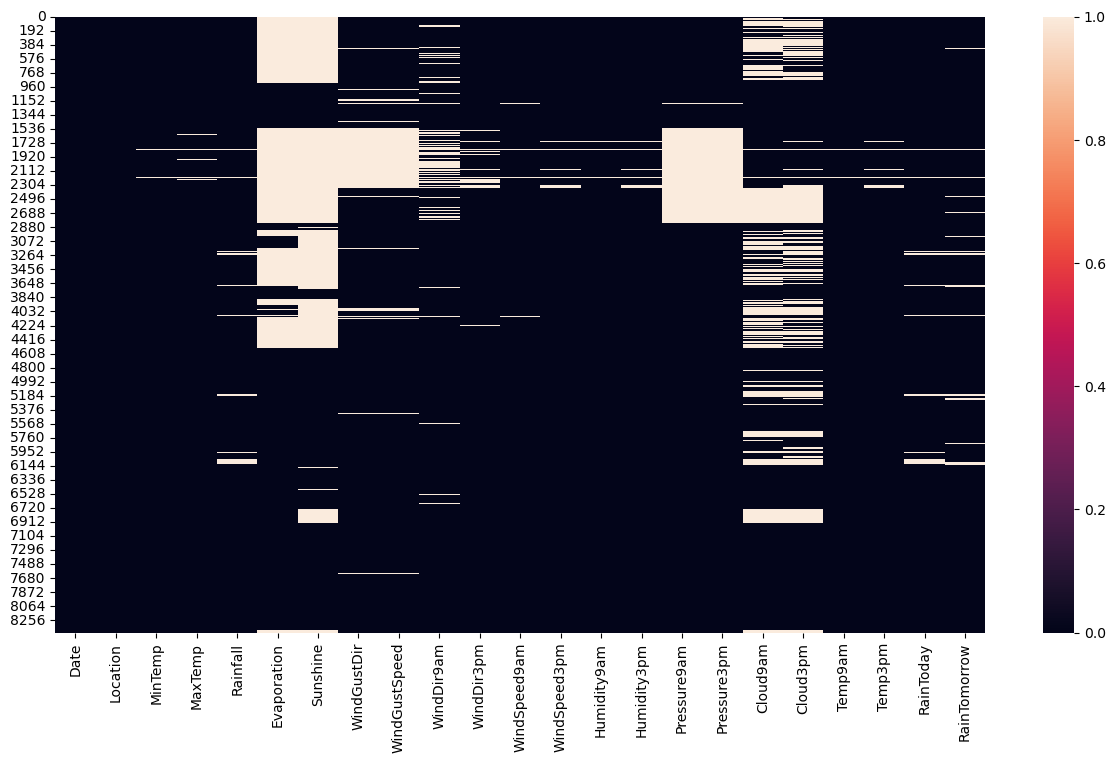

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

In [11]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [12]:
catg_features=[col for col in df.columns if df[col].dtypes=='object']
cont_features=[col for col in df.columns if df[col].dtypes!='object']
catg_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [13]:
cont_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

([<matplotlib.patches.Wedge at 0x202001e28d0>,
 [Text(0.6343483909086429, 0.8986668564888858, 'Categorical'),
  Text(-0.6343483909086428, -0.8986668564888859, 'Continuous')],
 [Text(0.3460082132228961, 0.4901819217212104, '30.4%'),
  Text(-0.34600821322289604, -0.49018192172121045, '69.6%')])

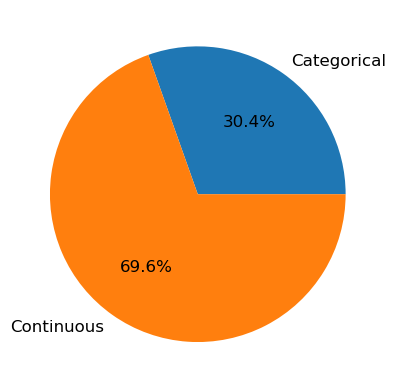

In [14]:
plt.pie([len(catg_features),len(cont_features)],labels=['Categorical','Continuous'],textprops={'fontsize':12},autopct='%1.1f%%')

In [15]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
df['RainTomorrow'].value_counts(normalize=True,dropna=False)*100

No     73.531157
Yes    23.632047
NaN     2.836795
Name: RainTomorrow, dtype: float64

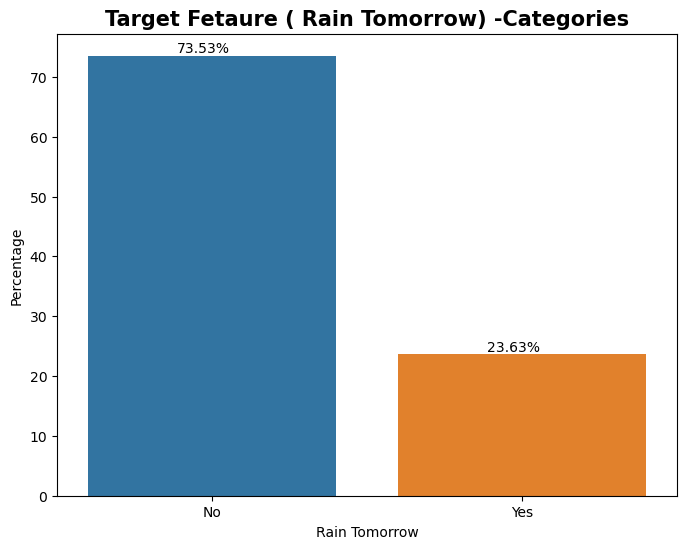

In [17]:
target_df=df['RainTomorrow'].value_counts(normalize=True,dropna=False)*100
plt.figure(figsize=(8,6))
plt.title("Target Fetaure ( Rain Tomorrow) -Categories",fontweight='bold',fontsize=15)
ax=sns.barplot(x=target_df.index,y=target_df.values)
plt.xlabel('Rain Tomorrow')
plt.ylabel('Percentage')

for p in ax.patches:
    height=p.get_height()
    width=p.get_width()
    x,_=p.get_xy()
    ax.text(x +width/2.8,height+.5,f'{height:.2f}%')


In [18]:
df['Date'].nunique()

3004

In [19]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Albury'),
  Text(1, 0, 'CoffsHarbour'),
  Text(2, 0, 'Newcastle'),
  Text(3, 0, 'Penrith'),
  Text(4, 0, 'Williamtown'),
  Text(5, 0, 'Wollongong'),
  Text(6, 0, 'Melbourne'),
  Text(7, 0, 'Brisbane'),
  Text(8, 0, 'Adelaide'),
  Text(9, 0, 'PerthAirport'),
  Text(10, 0, 'Darwin'),
  Text(11, 0, 'Uluru')])

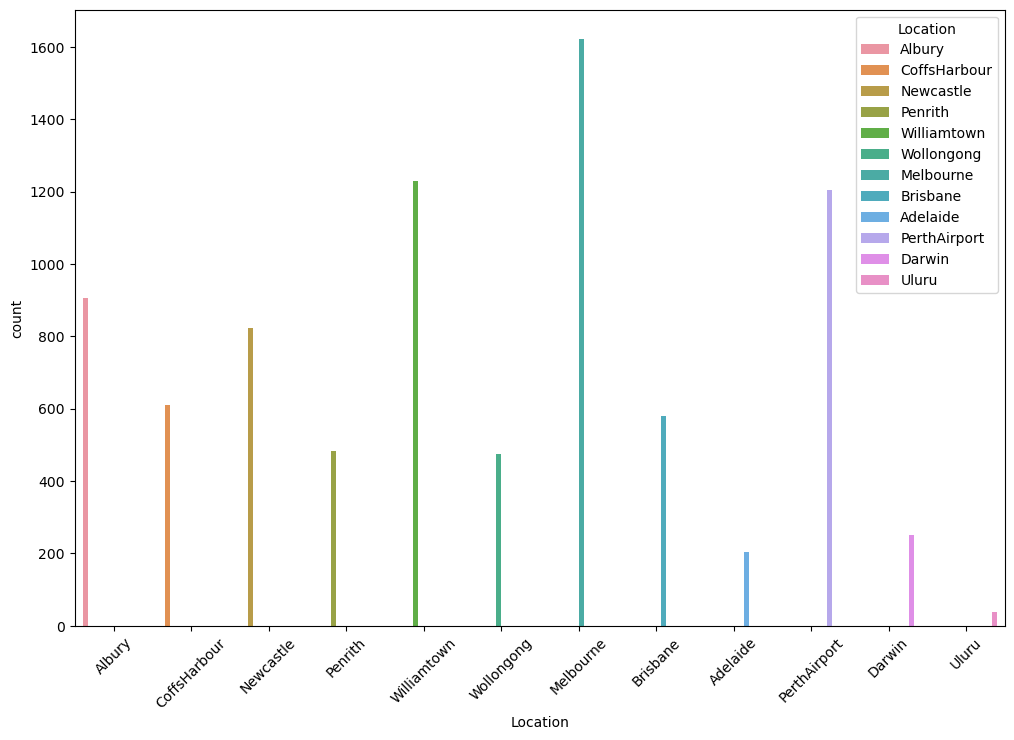

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x='Location',hue='Location',data=df)
plt.xticks(rotation=45)

<Axes: xlabel='MinTemp', ylabel='Density'>

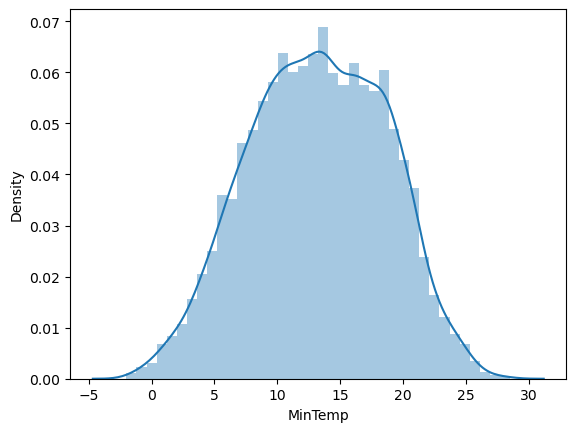

In [21]:
sns.distplot(df['MinTemp'])

<Axes: xlabel='MaxTemp', ylabel='Density'>

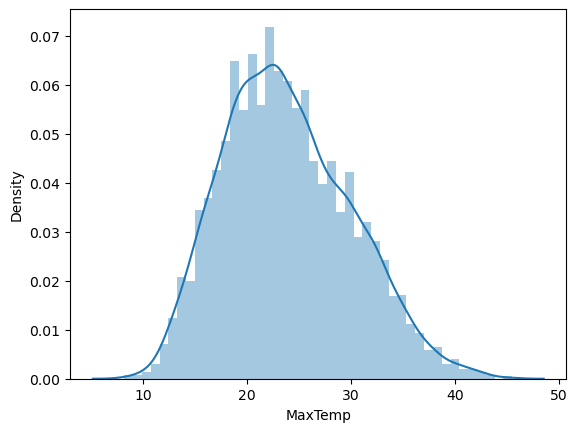

In [22]:
sns.distplot(df['MaxTemp'])

In [23]:
import random

color_=['#000057','#005757','#005700','#ad7100','#008080','#575757','#003153']
cmap_=['magma','copper','crest']

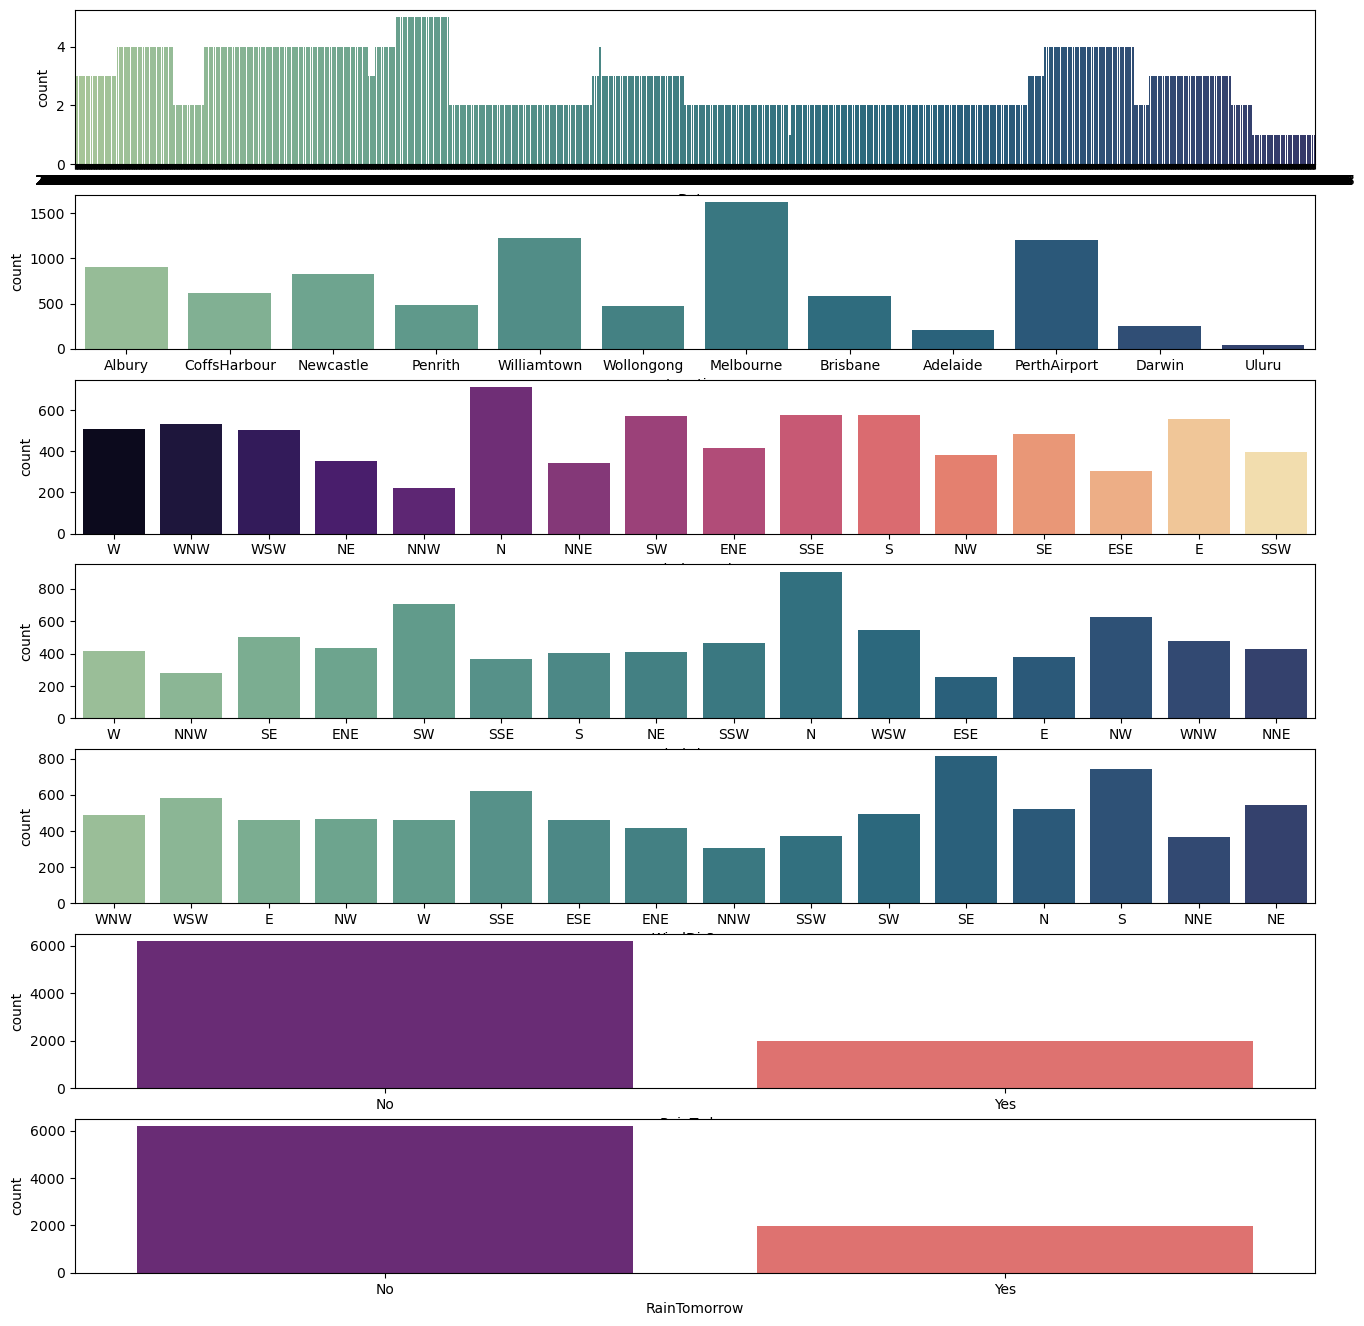

In [24]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[catg_features].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(21,1,i+1)
    
    sns.countplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

In [25]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [26]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Albury'),
  Text(1, 0, 'CoffsHarbour'),
  Text(2, 0, 'Newcastle'),
  Text(3, 0, 'Penrith'),
  Text(4, 0, 'Williamtown'),
  Text(5, 0, 'Wollongong'),
  Text(6, 0, 'Melbourne'),
  Text(7, 0, 'Brisbane'),
  Text(8, 0, 'Adelaide'),
  Text(9, 0, 'PerthAirport'),
  Text(10, 0, 'Darwin'),
  Text(11, 0, 'Uluru')])

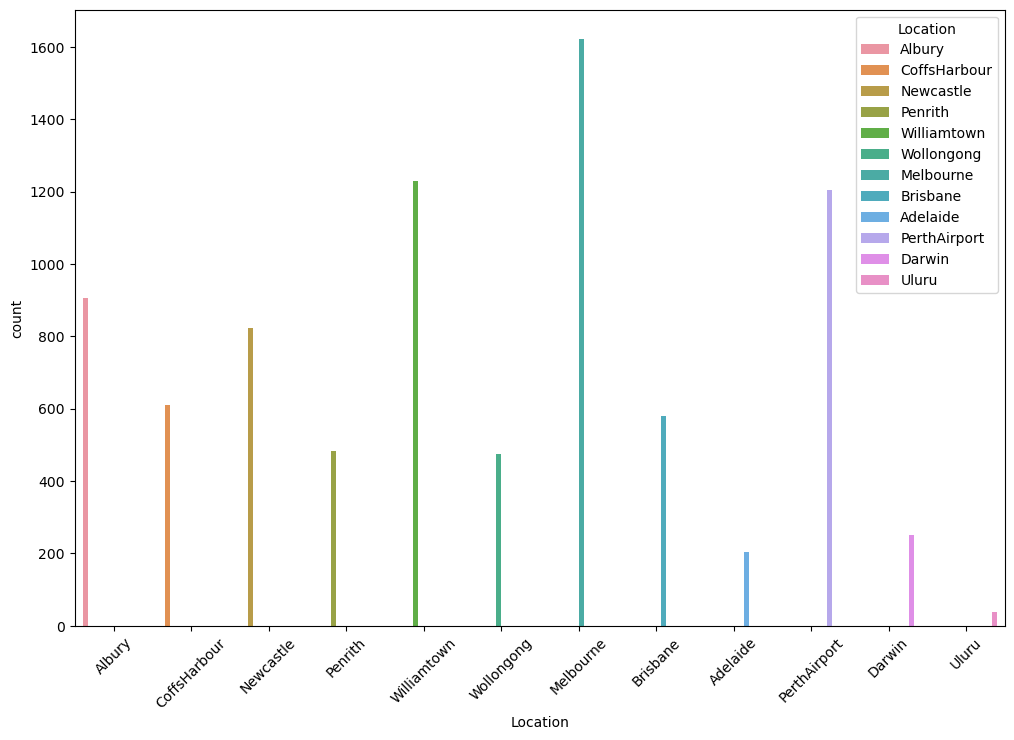

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x='Location',hue='Location',data=df)
plt.xticks(rotation=45)

<Axes: xlabel='Location'>

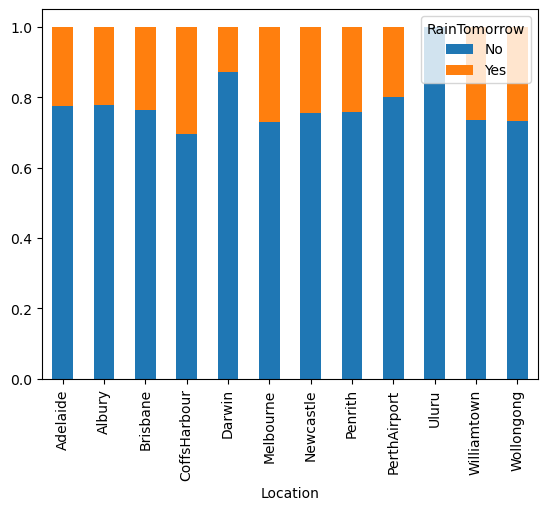

In [28]:
table=pd.crosstab(df['Location'],df['RainTomorrow'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

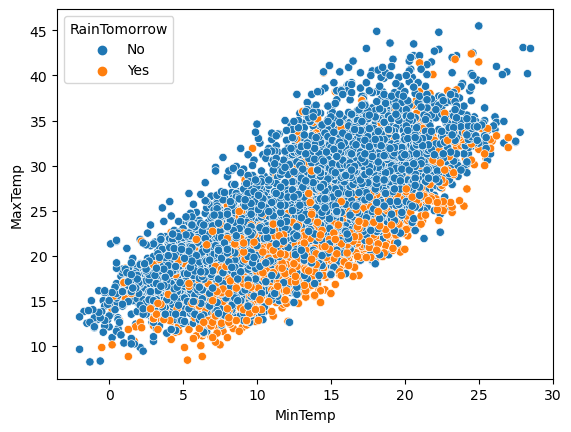

In [29]:
sns.scatterplot(x='MinTemp',y='MaxTemp',hue='RainTomorrow',data=df)

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

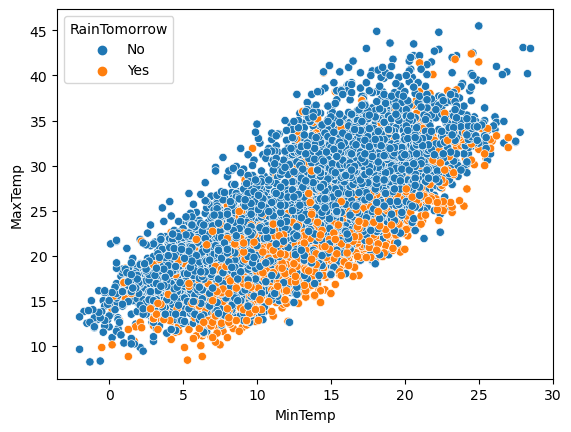

In [30]:
sns.scatterplot(x='MinTemp',y='MaxTemp',hue='RainTomorrow',data=df)

<Axes: xlabel='WindGustSpeed', ylabel='WindGustDir'>

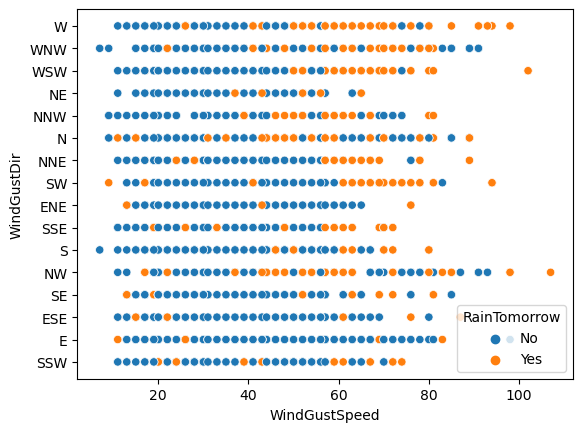

In [31]:
sns.scatterplot(x='WindGustSpeed',y='WindGustDir',hue='RainTomorrow',data=df)


<Axes: xlabel='WindSpeed9am', ylabel='WindDir9am'>

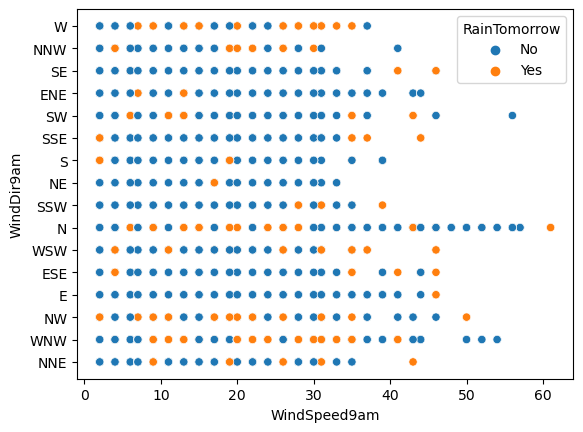

In [32]:
sns.scatterplot(x='WindSpeed9am',y='WindDir9am',hue='RainTomorrow',data=df)

<Axes: xlabel='WindSpeed3pm', ylabel='WindDir3pm'>

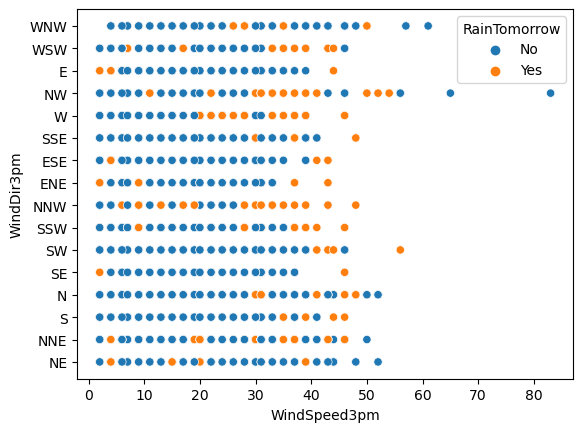

In [33]:
sns.scatterplot(x='WindSpeed3pm',y='WindDir3pm',hue='RainTomorrow',data=df)

In [34]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

<Axes: xlabel='Humidity3pm', ylabel='Humidity9am'>

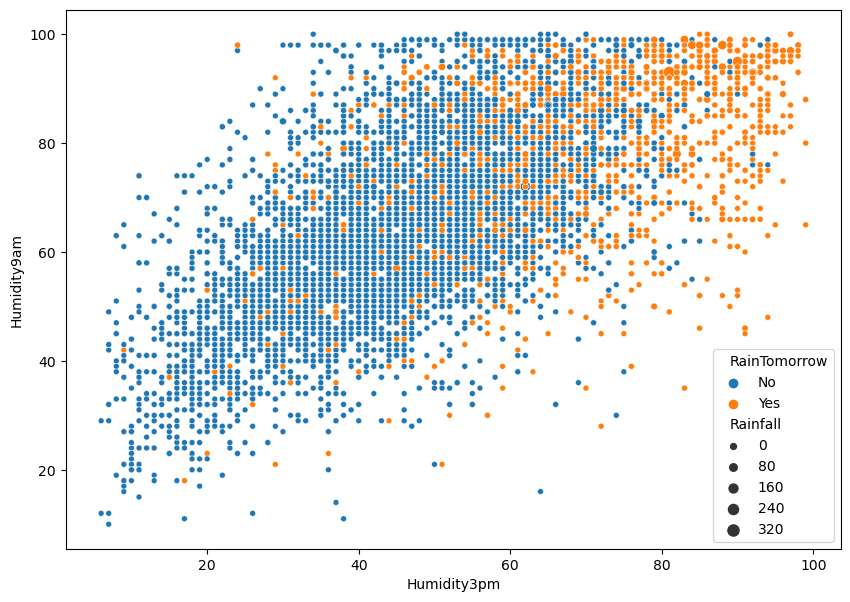

In [35]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Humidity3pm',y='Humidity9am',hue='RainTomorrow',size='Rainfall',data=df)

<Axes: xlabel='Pressure3pm', ylabel='Pressure9am'>

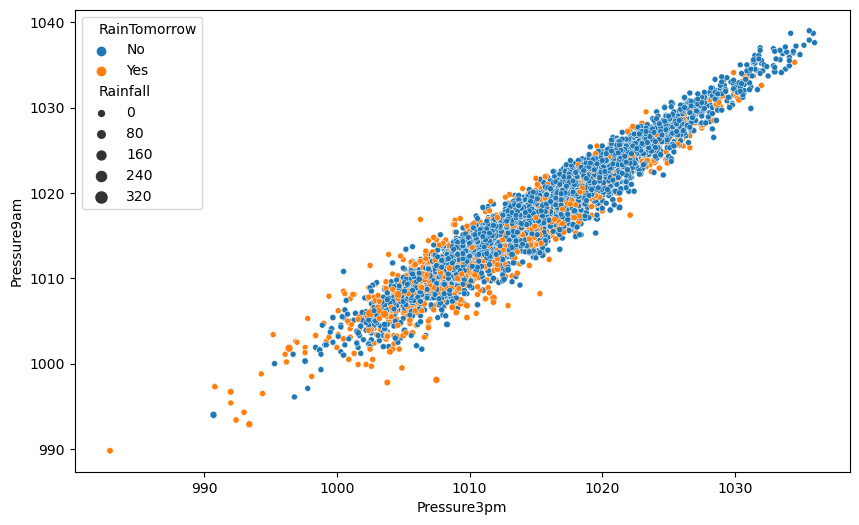

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Pressure3pm',y='Pressure9am',hue='RainTomorrow',size='Rainfall',data=df)

<Axes: xlabel='Cloud3pm', ylabel='Cloud9am'>

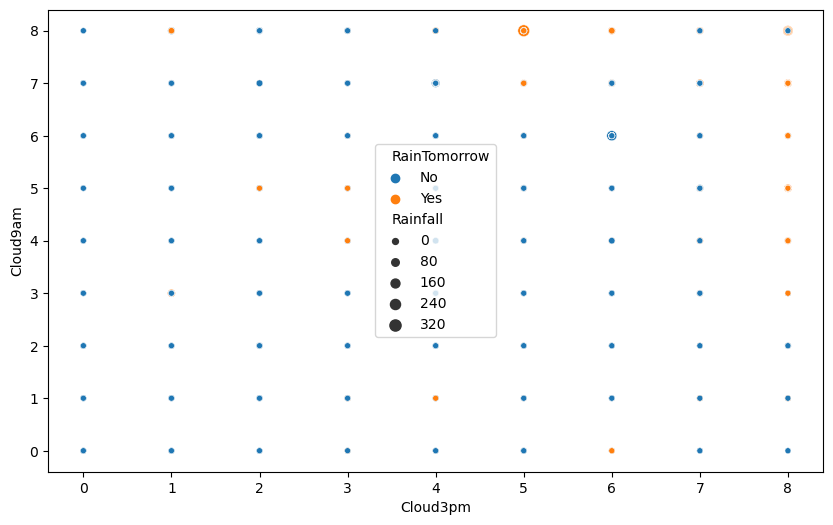

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Cloud3pm',y='Cloud9am',hue='RainTomorrow',size='Rainfall',data=df)

<Axes: xlabel='Temp3pm', ylabel='Temp9am'>

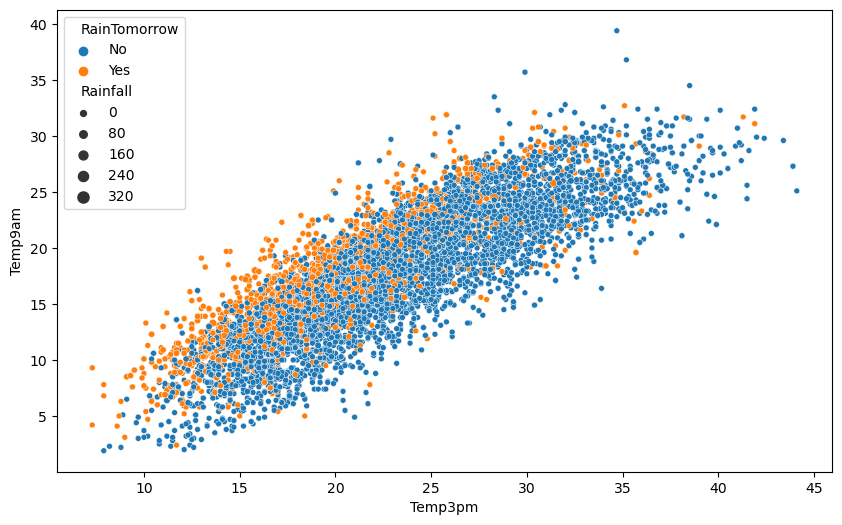

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temp3pm',y='Temp9am',hue='RainTomorrow',size='Rainfall',data=df)

In [39]:
df['RainToday'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

<Axes: xlabel='RainToday', ylabel='count'>

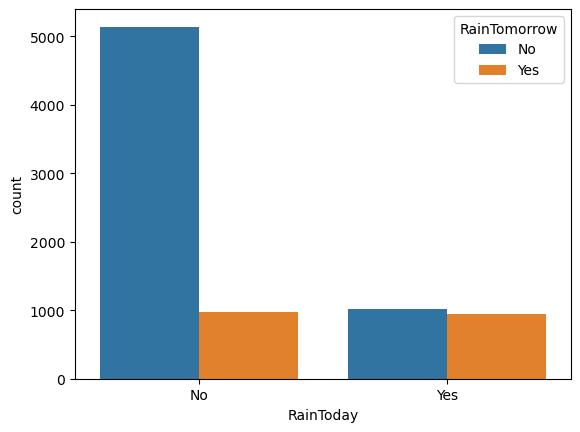

In [40]:
sns.countplot(x='RainToday',hue='RainTomorrow',data=df)

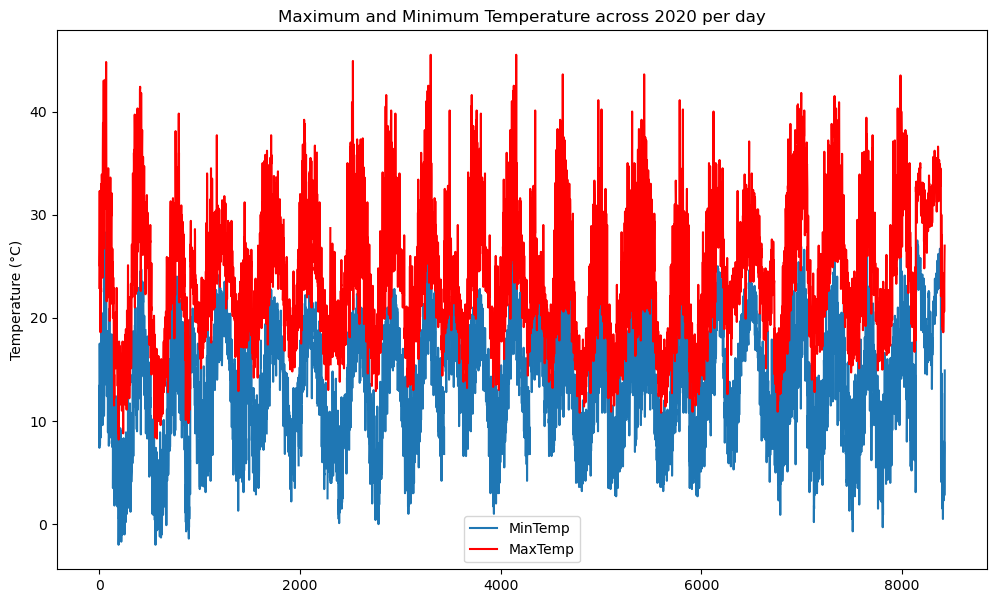

In [41]:
max_temp = df['MaxTemp']
min_temp = df['MinTemp']

min_temp.plot(figsize=(12,7), legend=True)
max_temp.plot(figsize=(12,7), color='r', legend=True)
plt.title('Maximum and Minimum Temperature across 2020 per day')
plt.ylabel('Temperature (°C)')
plt.show()

<Axes: >

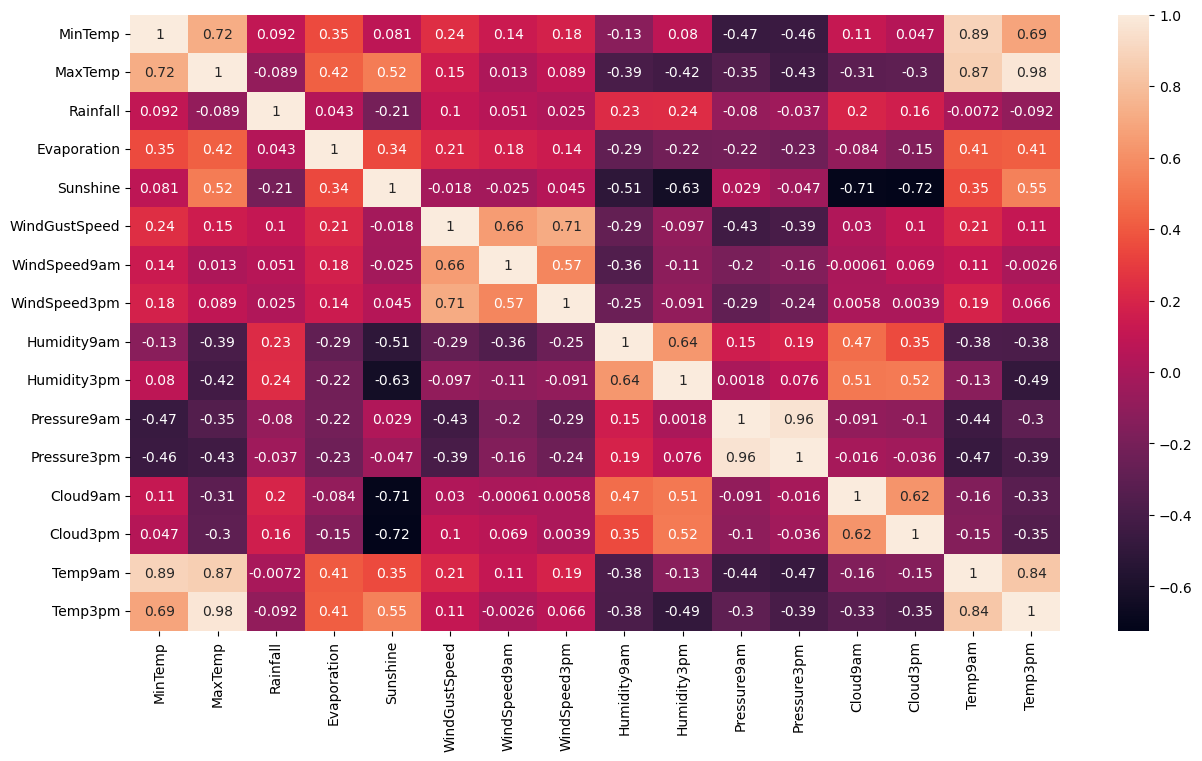

In [42]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [43]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Sunshine         47.41
Evaporation      41.69
Cloud3pm         29.14
Cloud9am         28.74
Pressure3pm      15.57
Pressure9am      15.54
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
RainToday         2.85
Rainfall          2.85
RainTomorrow      2.84
WindSpeed3pm      1.27
Humidity3pm       1.21
Temp3pm           1.14
WindSpeed9am      0.90
MinTemp           0.89
MaxTemp           0.71
Humidity9am       0.70
Temp9am           0.66
Location          0.00
Date              0.00
dtype: float64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [45]:
yes_rain = df[df['RainTomorrow']=='Yes']
no_rain = df[df['RainTomorrow']=='No']

In [46]:
yes_rain.shape , no_rain.shape

((1991, 23), (6195, 23))

In [47]:
# For Temparatures replacing NaN with its respective mode value # Mode is most repeated values
yes_rain['MinTemp'].fillna(yes_rain['MinTemp'].mode()[0],inplace=True)
no_rain['MinTemp'].fillna(no_rain['MinTemp'].mode()[0],inplace=True)

yes_rain['MaxTemp'].fillna(yes_rain['MaxTemp'].mode()[0],inplace=True)
no_rain['MaxTemp'].fillna(no_rain['MaxTemp'].mode()[0],inplace=True)

yes_rain['Temp9am'].fillna(yes_rain['Temp9am'].mode()[0],inplace=True)
no_rain['Temp9am'].fillna(no_rain['Temp9am'].mode()[0],inplace=True)

yes_rain['Temp3pm'].fillna(yes_rain['Temp3pm'].mode()[0],inplace=True)
no_rain['Temp3pm'].fillna(no_rain['Temp3pm'].mode()[0],inplace=True)


yes_rain['Humidity3pm'].fillna(yes_rain['Humidity3pm'].mode()[0],inplace=True)
no_rain['Humidity3pm'].fillna(no_rain['Humidity3pm'].mode()[0],inplace=True)

yes_rain['Humidity9am'].fillna(yes_rain['Humidity9am'].mode()[0],inplace=True)
no_rain['Humidity9am'].fillna(no_rain['Humidity9am'].mode()[0],inplace=True)
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Sunshine         47.41
Evaporation      41.69
Cloud3pm         29.14
Cloud9am         28.74
Pressure3pm      15.57
Pressure9am      15.54
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
RainToday         2.85
Rainfall          2.85
RainTomorrow      2.84
WindSpeed3pm      1.27
Humidity3pm       1.21
Temp3pm           1.14
WindSpeed9am      0.90
MinTemp           0.89
MaxTemp           0.71
Humidity9am       0.70
Temp9am           0.66
Location          0.00
Date              0.00
dtype: float64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [49]:
yes_rain['Sunshine'].fillna(yes_rain['Sunshine'].median(),inplace=True)
no_rain['Sunshine'].fillna(no_rain['Sunshine'].median(),inplace=True)

yes_rain['Evaporation'].fillna(yes_rain['Evaporation'].median(),inplace=True)
no_rain['Evaporation'].fillna(no_rain['Evaporation'].median(),inplace=True)

yes_rain['Cloud3pm'].fillna(yes_rain['Cloud3pm'].median(),inplace=True)
no_rain['Cloud3pm'].fillna(no_rain['Cloud3pm'].median(),inplace=True)

yes_rain['Cloud9am'].fillna(yes_rain['Cloud9am'].median(),inplace=True)
no_rain['Cloud9am'].fillna(no_rain['Cloud9am'].median(),inplace=True)

yes_rain['Pressure3pm'].fillna(yes_rain['Pressure3pm'].median(),inplace=True)
no_rain['Pressure3pm'].fillna(no_rain['Pressure3pm'].median(),inplace=True)

yes_rain['Pressure9am'].fillna(yes_rain['Pressure9am'].median(),inplace=True)
no_rain['Pressure9am'].fillna(no_rain['Pressure9am'].median(),inplace=True)

yes_rain['WindGustDir'].fillna(yes_rain['WindGustDir'].mode()[0],inplace=True)
no_rain['WindGustDir'].fillna(no_rain['WindGustDir'].mode()[0],inplace=True)

yes_rain['WindGustSpeed'].fillna(yes_rain['WindGustSpeed'].median(),inplace=True)
no_rain['WindGustSpeed'].fillna(no_rain['WindGustSpeed'].median(),inplace=True)

yes_rain['WindDir9am'].fillna(yes_rain['WindDir9am'].mode()[0],inplace=True)
no_rain['WindDir9am'].fillna(no_rain['WindDir9am'].mode()[0],inplace=True)

yes_rain['WindDir3pm'].fillna(yes_rain['WindDir3pm'].mode()[0],inplace=True)
no_rain['WindDir3pm'].fillna(no_rain['WindDir3pm'].mode()[0],inplace=True)

yes_rain['WindSpeed3pm'].fillna(yes_rain['WindSpeed3pm'].median(),inplace=True)
no_rain['WindSpeed3pm'].fillna(no_rain['WindSpeed3pm'].median(),inplace=True)

yes_rain['WindSpeed9am'].fillna(yes_rain['WindSpeed9am'].median(),inplace=True)
no_rain['WindSpeed9am'].fillna(no_rain['WindSpeed9am'].median(),inplace=True)



yes_rain['Rainfall'].fillna(yes_rain['Rainfall'].median(),inplace=True)
no_rain['Rainfall'].fillna(no_rain['Rainfall'].median(),inplace=True)
data= yes_rain.append(no_rain, ignore_index=True)
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-09,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes
1,2008-12-11,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes
2,2008-12-12,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
3,2008-12-13,Albury,15.9,18.6,15.6,3.8,4.2,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
4,2008-12-17,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,2017-06-20,Uluru,3.5,21.8,0.0,4.8,9.6,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,4.0,4.0,9.4,20.9,No,No
8182,2017-06-21,Uluru,2.8,23.4,0.0,4.8,9.6,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.0,4.0,10.1,22.4,No,No
8183,2017-06-22,Uluru,3.6,25.3,0.0,4.8,9.6,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,4.0,4.0,10.9,24.5,No,No
8184,2017-06-23,Uluru,5.4,26.9,0.0,4.8,9.6,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,4.0,4.0,12.5,26.1,No,No


In [50]:
data.shape

(8186, 23)

In [51]:
data.dropna(inplace=True)

In [52]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-09,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes
1,2008-12-11,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes
2,2008-12-12,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
3,2008-12-13,Albury,15.9,18.6,15.6,3.8,4.2,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
4,2008-12-17,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes


In [53]:
 #COnvert Date feature into datetime
data['Date']=pd.to_datetime(data['Date'])
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day
data.drop('Date',axis=1,inplace=True)
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,NW,...,1003.6,7.0,7.0,18.3,30.2,No,Yes,2008,12,9
1,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,ESE,...,1008.7,7.0,7.0,20.4,28.8,No,Yes,2008,12,11
2,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,ENE,...,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,2008,12,12
3,Albury,15.9,18.6,15.6,3.8,4.2,W,61.0,NNW,NNW,...,993.0,8.0,8.0,17.4,15.8,Yes,Yes,2008,12,13
4,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,E,...,1010.4,8.0,1.0,17.2,18.1,No,Yes,2008,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,Uluru,3.5,21.8,0.0,4.8,9.6,E,31.0,ESE,E,...,1021.2,4.0,4.0,9.4,20.9,No,No,2017,6,20
8182,Uluru,2.8,23.4,0.0,4.8,9.6,E,31.0,SE,ENE,...,1020.3,4.0,4.0,10.1,22.4,No,No,2017,6,21
8183,Uluru,3.6,25.3,0.0,4.8,9.6,NNW,22.0,SE,N,...,1019.1,4.0,4.0,10.9,24.5,No,No,2017,6,22
8184,Uluru,5.4,26.9,0.0,4.8,9.6,N,37.0,SE,WNW,...,1016.8,4.0,4.0,12.5,26.1,No,No,2017,6,23


In [54]:
d1=data  # will be used for regression problem
num=[col for col in data.columns if data[col].dtypes!='O']
num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'year',
 'month',
 'day']

In [55]:
v=data[num]

In [56]:
v=data[num]

In [57]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

v = data[num]
sc = StandardScaler()
scaled = sc.fit_transform(v)

VIF = pd.DataFrame()
VIF['features'] = v.columns
VIF['vif'] = [variance_inflation_factor(scaled, i) for i in range(len(v.columns))]

VIF

,features,vif
0,MinTemp,8.536558
1,MaxTemp,25.650652
2,Rainfall,1.131077
3,Evaporation,1.217936
4,Sunshine,2.137066
5,WindGustSpeed,2.353808
6,WindSpeed9am,2.030998
7,WindSpeed3pm,1.946039
8,Humidity9am,3.854017
9,Humidity3pm,5.579726


In [58]:
num.remove('Pressure9am')
v=data[num]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,8.307049
1,MaxTemp,25.618888
2,Rainfall,1.125021
3,Evaporation,1.216821
4,Sunshine,2.134771
5,WindGustSpeed,2.343401
6,WindSpeed9am,2.026784
7,WindSpeed3pm,1.938693
8,Humidity9am,3.833913
9,Humidity3pm,5.432704


In [59]:
num.remove('Temp3pm')

In [60]:
v=data[num]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,8.282180
1,MaxTemp,8.650329
2,Rainfall,1.124425
3,Evaporation,1.216592
4,Sunshine,2.134751
5,WindGustSpeed,2.325879
6,WindSpeed9am,2.025740
7,WindSpeed3pm,1.930832
8,Humidity9am,3.374529
9,Humidity3pm,3.783076


In [61]:
data.shape

(8079, 25)

In [62]:
data.drop(['Temp3pm','Temp9am','Pressure9am'],axis=1,inplace=True)
data.shape

(8079, 22)

In [63]:
data.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,NW,...,42.0,9.0,1003.6,7.0,7.0,No,Yes,2008,12,9
1,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,ESE,...,48.0,22.0,1008.7,7.0,7.0,No,Yes,2008,12,11


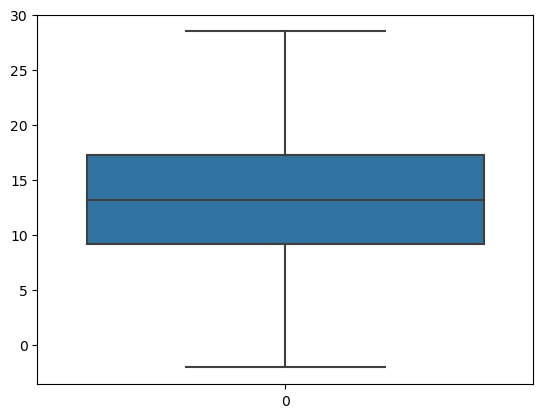

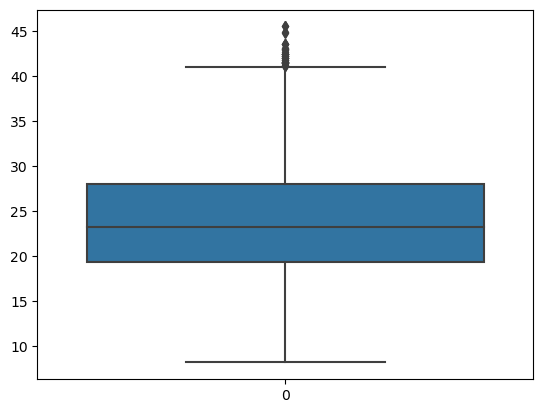

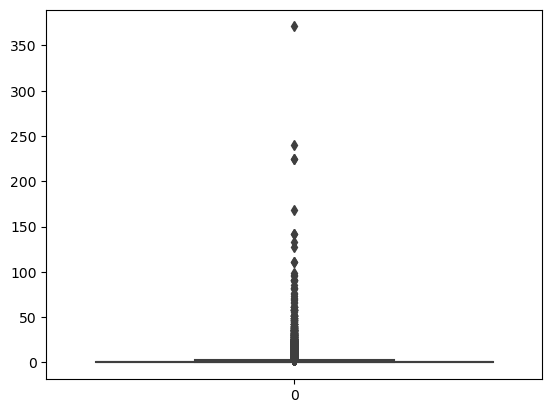

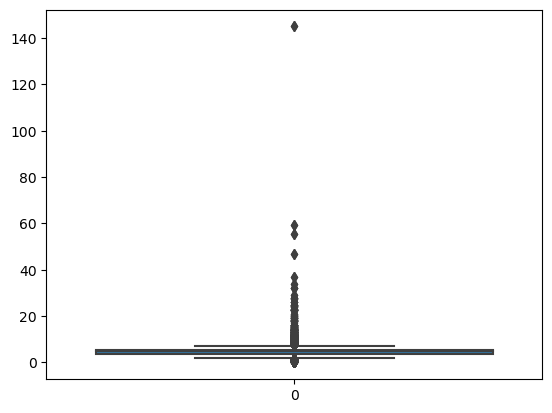

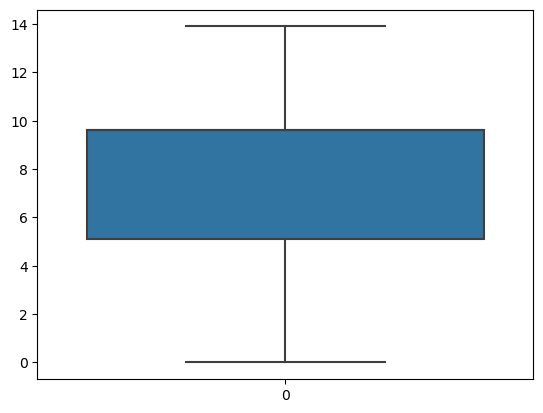

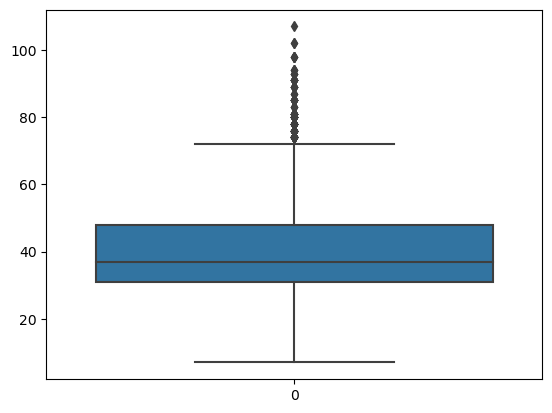

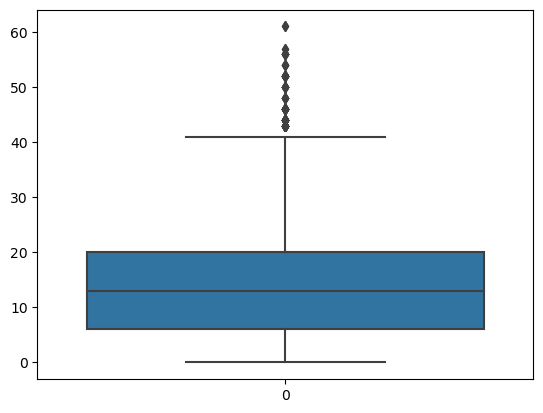

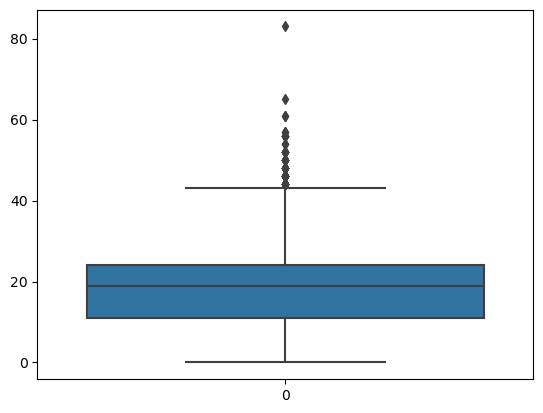

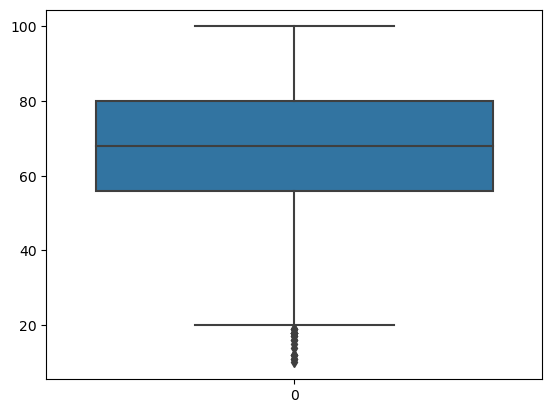

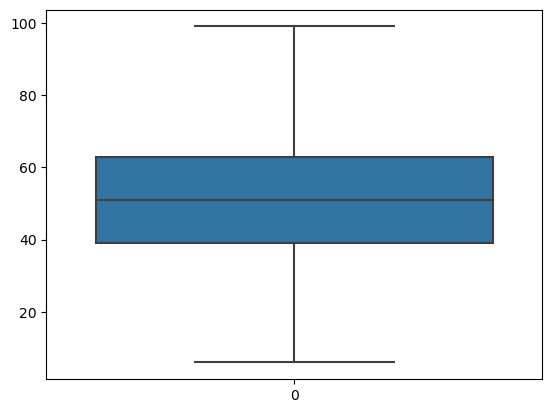

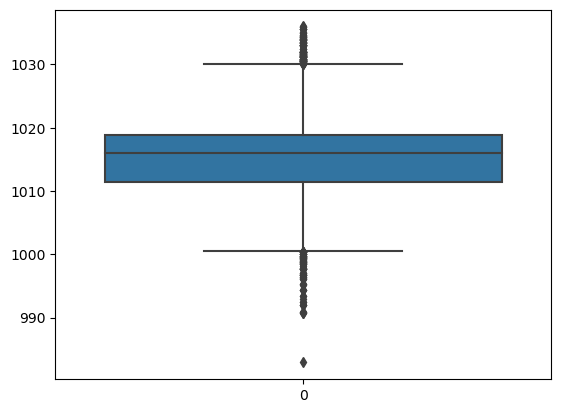

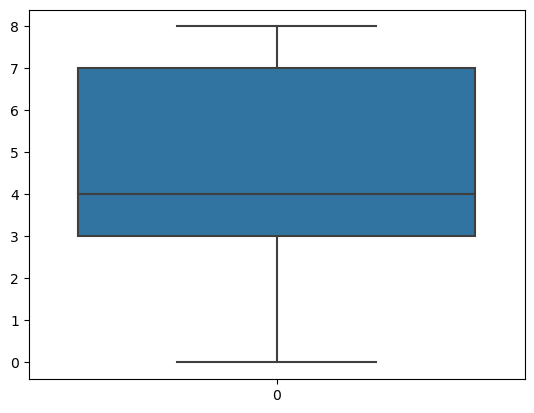

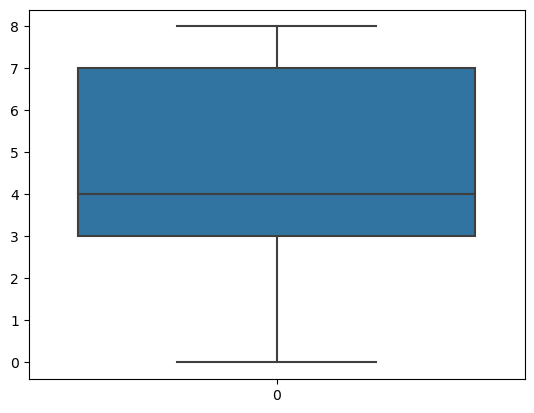

KeyError: 'Temp9am'

In [64]:
for i in num:
    sns.boxplot(data[i])
    plt.show()

<Axes: xlabel='Rainfall', ylabel='Density'>

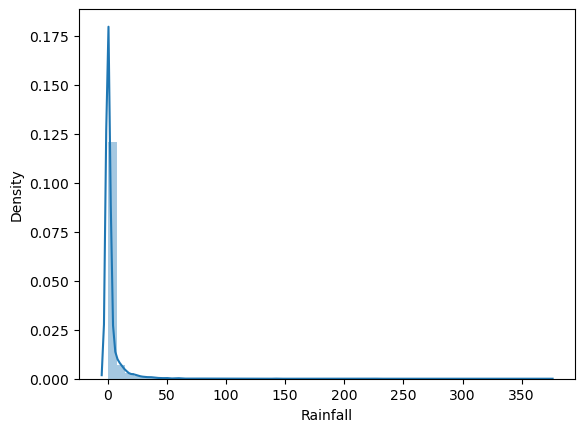

In [65]:
sns.distplot(data['Rainfall'])

In [66]:
data[num].skew()

KeyError: "['Temp9am'] not in index"

In [67]:
for i in num:
    IQR= data[i].quantile(.75)-data[i].quantile(.25)
    lower=data[i].quantile(.25) - (1.5 * IQR)
    upper=data[i].quantile(.75) + (1.5 * IQR)
    data[i]=np.where(data[i]<lower,lower,data[i])
    data[i]=np.where(data[i]>upper,upper,data[i])
for i in num:
    sns.boxplot(data[i])
    plt.show()

KeyError: 'Temp9am'

In [68]:
data[num].skew()     

KeyError: "['Temp9am'] not in index"

In [69]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in num:
    trans=power_transform(data[num])
    data[i]=sc.fit_transform(trans)
data.head()

KeyError: "['Temp9am'] not in index"

In [70]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,9.7,31.9,0.0,3.8,4.2,NNW,73.5,SE,NW,...,42.0,9.0,1003.6,7.0,7.0,No,Yes,2008,12,9
1,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,ESE,...,48.0,22.0,1008.7,7.0,7.0,No,Yes,2008,12,11
2,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,ENE,...,89.0,91.0,1004.2,8.0,8.0,Yes,Yes,2008,12,12
3,Albury,15.9,18.6,2.5,3.8,4.2,W,61.0,NNW,NNW,...,76.0,93.0,1000.4,8.0,8.0,Yes,Yes,2008,12,13
4,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,E,...,69.0,82.0,1010.4,8.0,1.0,No,Yes,2008,12,17


In [71]:
chitest=data[['Location','WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']]
chitest

,Location,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,Albury,NNW,SE,NW,Yes
1,Albury,N,SSE,ESE,Yes
2,Albury,NNE,NE,ENE,Yes
3,Albury,W,NNW,NNW,Yes
4,Albury,ENE,SSW,E,Yes
...,...,...,...,...,...
8181,Uluru,E,ESE,E,No
8182,Uluru,E,SE,ENE,No
8183,Uluru,NNW,SE,N,No
8184,Uluru,N,SE,WNW,No


In [72]:
import numpy as np
ordinal_label = {k: i for i, k in enumerate(chitest['WindGustDir'].unique(), 0)}
chitest['WindGustDir'] = chitest['WindGustDir'].map(ordinal_label)

In [73]:
ordinal_label = {k: i for i, k in enumerate(chitest['Location'].unique(), 0)}
chitest['Location'] = chitest['Location'].map(ordinal_label)

In [74]:
ordinal_label = {k: i for i, k in enumerate(chitest['WindDir9am'].unique(), 0)}
chitest['WindDir9am'] = chitest['WindDir9am'].map(ordinal_label)

In [75]:
ordinal_label = {k: i for i, k in enumerate(chitest['WindDir3pm'].unique(), 0)}
chitest['WindDir3pm'] = chitest['WindDir3pm'].map(ordinal_label)

In [76]:
chitest['RainTomorrow'].replace('No',0,inplace=True)
chitest['RainTomorrow'].replace('Yes',1,inplace=True)
chitest

,Location,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,0,0,0,0,1
1,0,1,1,1,1
2,0,2,2,2,1
3,0,3,3,3,1
4,0,4,4,4,1
...,...,...,...,...,...
8181,11,12,7,4,0
8182,11,12,0,2,0
8183,11,0,0,9,0
8184,11,1,0,5,0


In [77]:
inp=chitest.drop('RainTomorrow',axis=1)
out=chitest['RainTomorrow']

In [78]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(inp,out)
f_p_values

(array([34.02791176,  2.63753342, 20.16354411,  0.47166443]),
 array([5.43271338e-09, 1.04365465e-01, 7.10950475e-06, 4.92222447e-01]))

In [79]:
p_values=pd.Series(f_p_values[1])
p_values.index=inp.columns
p_values

Location       5.432713e-09
WindGustDir    1.043655e-01
WindDir9am     7.109505e-06
WindDir3pm     4.922224e-01
dtype: float64

<Axes: >

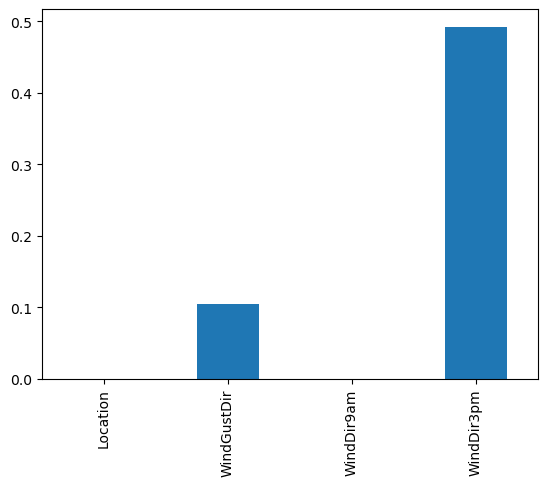

In [80]:
p_values.plot.bar()

In [81]:
16-1 * (2-1 )

15

In [82]:
data.drop('WindDir3pm',axis=1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,9.7,31.9,0.0,3.8,4.2,NNW,73.5,SE,7.0,...,42.0,9.0,1003.6,7.0,7.0,No,Yes,2008,12,9
1,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,17.0,...,48.0,22.0,1008.7,7.0,7.0,No,Yes,2008,12,11
2,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,15.0,...,89.0,91.0,1004.2,8.0,8.0,Yes,Yes,2008,12,12
3,Albury,15.9,18.6,2.5,3.8,4.2,W,61.0,NNW,28.0,...,76.0,93.0,1000.4,8.0,8.0,Yes,Yes,2008,12,13
4,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,11.0,...,69.0,82.0,1010.4,8.0,1.0,No,Yes,2008,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,Uluru,3.5,21.8,0.0,4.8,9.6,E,31.0,ESE,15.0,...,59.0,27.0,1021.2,4.0,4.0,No,No,2017,6,20
8182,Uluru,2.8,23.4,0.0,4.8,9.6,E,31.0,SE,13.0,...,51.0,24.0,1020.3,4.0,4.0,No,No,2017,6,21
8183,Uluru,3.6,25.3,0.0,4.8,9.6,NNW,22.0,SE,13.0,...,56.0,21.0,1019.1,4.0,4.0,No,No,2017,6,22
8184,Uluru,5.4,26.9,0.0,4.8,9.6,N,37.0,SE,9.0,...,53.0,24.0,1016.8,4.0,4.0,No,No,2017,6,23


In [83]:
#Encoding
data['RainTomorrow'].replace('No',0,inplace=True)
data['RainTomorrow'].replace('Yes',1,inplace=True)

data['RainToday'].replace('No',0,inplace=True)
data['RainToday'].replace('Yes',1,inplace=True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,9.7,31.9,0.0,3.8,4.2,NNW,73.5,SE,NW,...,42.0,9.0,1003.6,7.0,7.0,0,1,2008,12,9
1,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,ESE,...,48.0,22.0,1008.7,7.0,7.0,0,1,2008,12,11
2,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,ENE,...,89.0,91.0,1004.2,8.0,8.0,1,1,2008,12,12
3,Albury,15.9,18.6,2.5,3.8,4.2,W,61.0,NNW,NNW,...,76.0,93.0,1000.4,8.0,8.0,1,1,2008,12,13
4,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,E,...,69.0,82.0,1010.4,8.0,1.0,0,1,2008,12,17


In [84]:
X=data.drop('RainTomorrow',axis=1)
Y=data['RainTomorrow']
X.shape  , Y.shape

((8079, 21), (8079,))

In [85]:
X=pd.get_dummies(X,drop_first=True)
X.shape , Y.shape

((8079, 73), (8079,))

In [86]:
#SMOTE- Balancing dataset
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(X,Y)
x.shape , y.shape

((12310, 73), (12310,))

In [87]:
#Machine Leaning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [88]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.30)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8957487137828324 on Random State = 72


In [89]:
# Use, Random state= 122
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=122,test_size=.3)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [91]:
accuracy=[]
f1=[]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    f1.append(round(f1_score(y_test,pred) * 100, 2))
    #print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    #print("F1 SCore                ", f1_score(y_test,pred)*100)
    #print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    #print(classification_report(y_test,pred))
    #print('*'*50)
    
pd.DataFrame({'Model':model,'Accuracy':accuracy,'F1 Score':f1})

,Model,Accuracy,F1 Score
0,LogisticRegression(),88.74,88.97
1,RidgeClassifier(),91.80,91.85
2,DecisionTreeClassifier(),94.50,94.60
3,SVC(),76.63,76.62
4,KNeighborsClassifier(),89.28,90.09
5,"(DecisionTreeClassifier(max_features='sqrt', r...",96.99,97.05
6,"XGBClassifier(base_score=None, booster=None, c...",97.35,97.38
7,SGDClassifier(),81.40,84.00
8,(DecisionTreeClassifier(random_state=558997084...,96.29,96.30
9,"(DecisionTreeClassifier(max_depth=1, random_st...",92.36,92.49


In [92]:
#BaggingClassifier() Hypertuning
params = {'n_estimators' : [100,150,200,300,500],
    'max_features' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(Bag_model,param_grid=params,cv=5,n_jobs=-1,verbose=2)
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_estimator_

In [95]:
GCV.best_params_

{'max_features': 5, 'max_samples': 0.5, 'n_estimators': 500}

In [96]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9350121852152722

<Axes: >

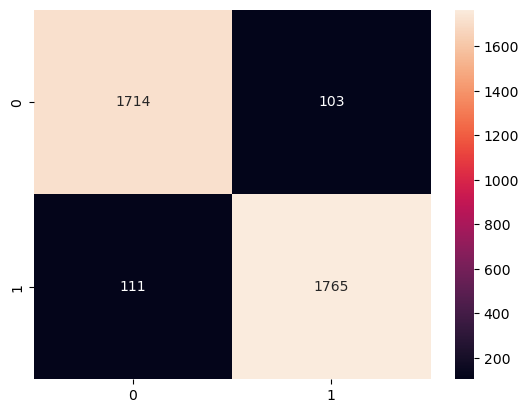

In [97]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

In [98]:
#AUC ROC plot
from sklearn.metrics import roc_curve, auc
 # Get the probability of the positive class

In [99]:
#Saving Model
import joblib
joblib.dump(GB_model,"Rainfall_Prediction.pkl")
['Rainfall_Prediction.pkl']

['Rainfall_Prediction.pkl']

In [100]:
#Predict the Rainfall in MM. Regression Model
d1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,9.7,31.9,0.0,3.8,4.2,NNW,73.5,SE,NW,...,42.0,9.0,1003.6,7.0,7.0,0,1,2008,12,9
1,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,ESE,...,48.0,22.0,1008.7,7.0,7.0,0,1,2008,12,11
2,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,ENE,...,89.0,91.0,1004.2,8.0,8.0,1,1,2008,12,12
3,Albury,15.9,18.6,2.5,3.8,4.2,W,61.0,NNW,NNW,...,76.0,93.0,1000.4,8.0,8.0,1,1,2008,12,13
4,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,E,...,69.0,82.0,1010.4,8.0,1.0,0,1,2008,12,17


In [101]:
round(d1.isnull().sum()/d1.shape[0]*100,2).sort_values(ascending=False)

Location         0.0
MinTemp          0.0
month            0.0
year             0.0
RainTomorrow     0.0
RainToday        0.0
Cloud3pm         0.0
Cloud9am         0.0
Pressure3pm      0.0
Humidity3pm      0.0
Humidity9am      0.0
WindSpeed3pm     0.0
WindSpeed9am     0.0
WindDir3pm       0.0
WindDir9am       0.0
WindGustSpeed    0.0
WindGustDir      0.0
Sunshine         0.0
Evaporation      0.0
Rainfall         0.0
MaxTemp          0.0
day              0.0
dtype: float64

<Axes: >

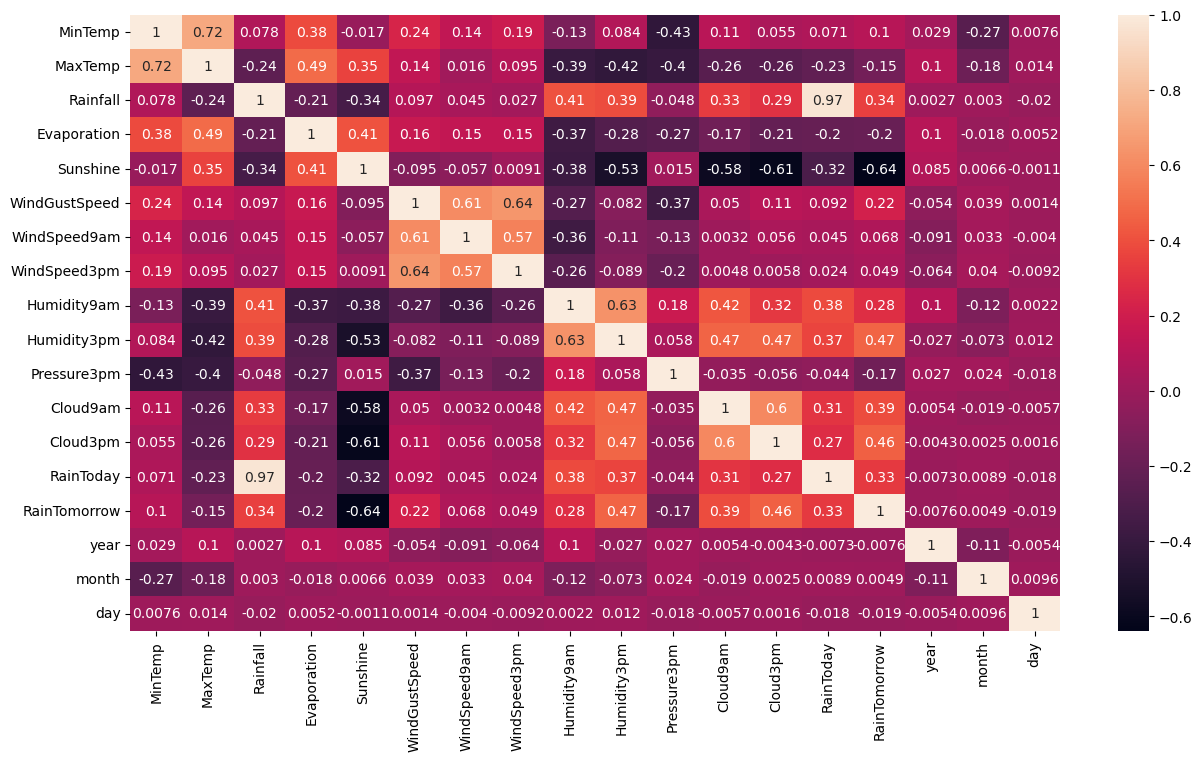

In [102]:
plt.figure(figsize=(15,8))
sns.heatmap(d1.corr(),annot=True)

In [103]:
cont= [i for i in d1.columns if d1[i].dtypes!='O']
cont.remove('Rainfall')
cont

['MinTemp',
 'MaxTemp',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'RainToday',
 'RainTomorrow',
 'year',
 'month',
 'day']

In [104]:
v=d1[cont]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,4.548941
1,MaxTemp,5.287521
2,Evaporation,1.644087
3,Sunshine,2.927793
4,WindGustSpeed,2.401863
5,WindSpeed9am,2.026115
6,WindSpeed3pm,1.911278
7,Humidity9am,2.490217
8,Humidity3pm,3.170623
9,Pressure3pm,1.464147


In [105]:
cont.remove('MaxTemp')

In [106]:
v=d1[cont]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,1.648520
1,Evaporation,1.635586
2,Sunshine,2.852141
3,WindGustSpeed,2.401675
4,WindSpeed9am,1.958498
5,WindSpeed3pm,1.908465
6,Humidity9am,2.485230
7,Humidity3pm,2.295025
8,Pressure3pm,1.439507
9,Cloud9am,1.952435


In [107]:
v=d1[cont]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,1.648520
1,Evaporation,1.635586
2,Sunshine,2.852141
3,WindGustSpeed,2.401675
4,WindSpeed9am,1.958498
5,WindSpeed3pm,1.908465
6,Humidity9am,2.485230
7,Humidity3pm,2.295025
8,Pressure3pm,1.439507
9,Cloud9am,1.952435


In [108]:

v=d1[cont]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,1.648520
1,Evaporation,1.635586
2,Sunshine,2.852141
3,WindGustSpeed,2.401675
4,WindSpeed9am,1.958498
5,WindSpeed3pm,1.908465
6,Humidity9am,2.485230
7,Humidity3pm,2.295025
8,Pressure3pm,1.439507
9,Cloud9am,1.952435


<Axes: >

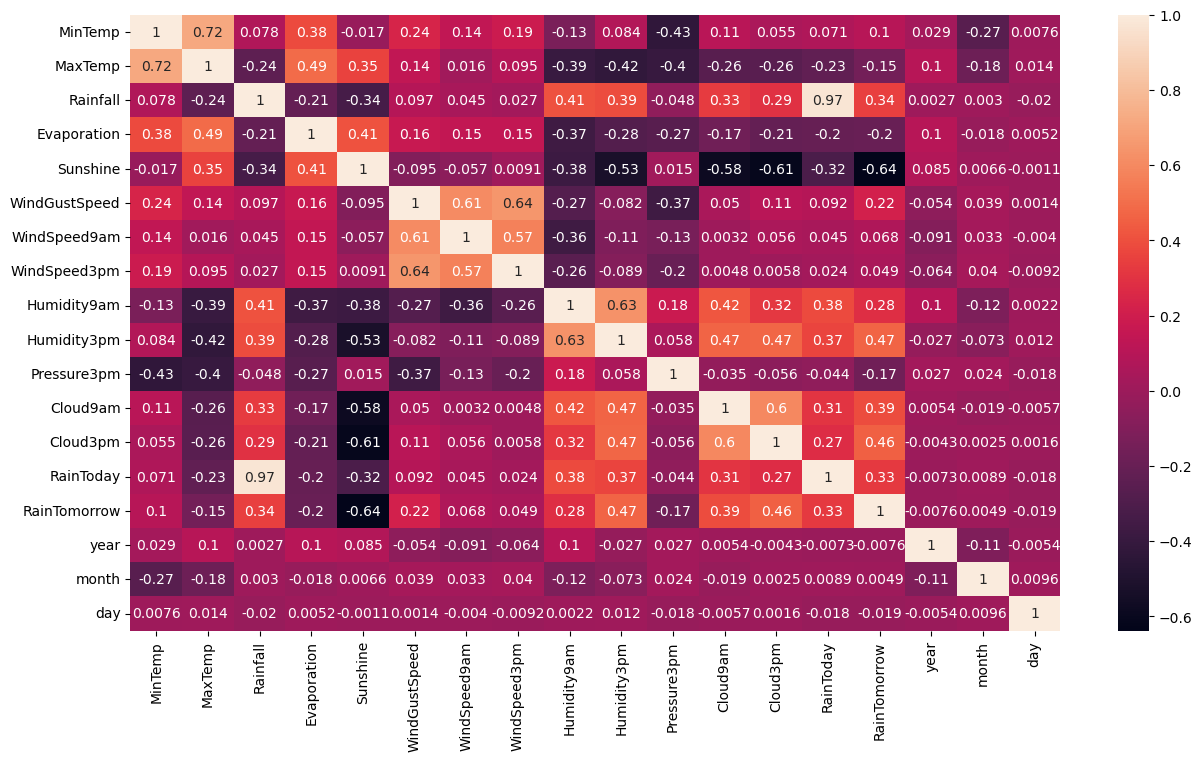

In [109]:
plt.figure(figsize=(15,8))
sns.heatmap(d1.corr(),annot=True)

In [110]:
X=d1.drop('Rainfall',axis=1)
Y=d1['Rainfall']
X.shape , Y.shape

((8079, 21), (8079,))

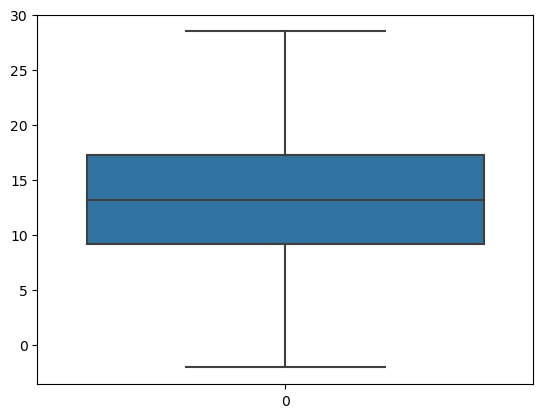

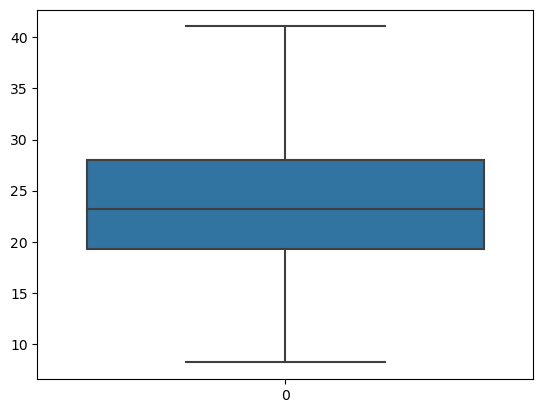

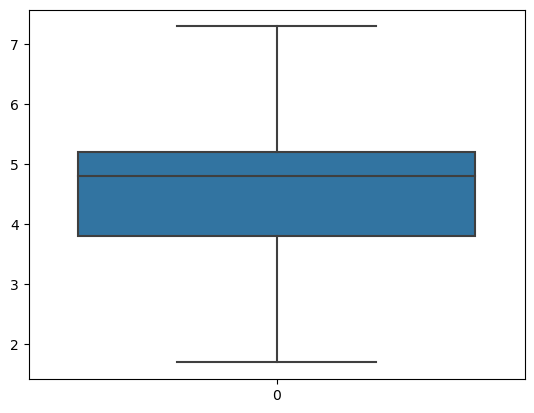

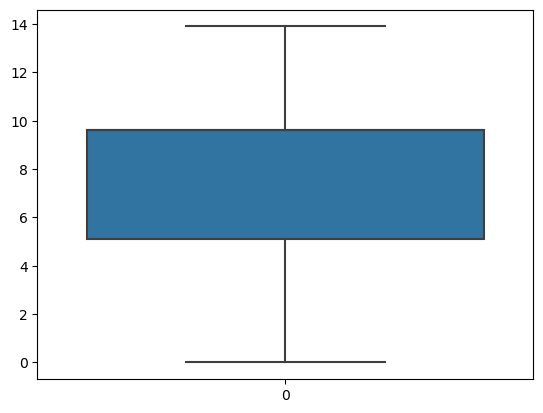

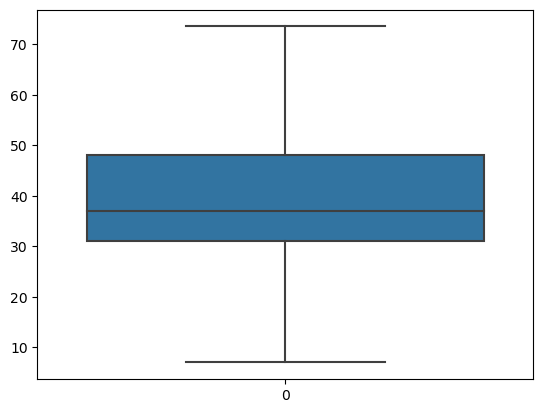

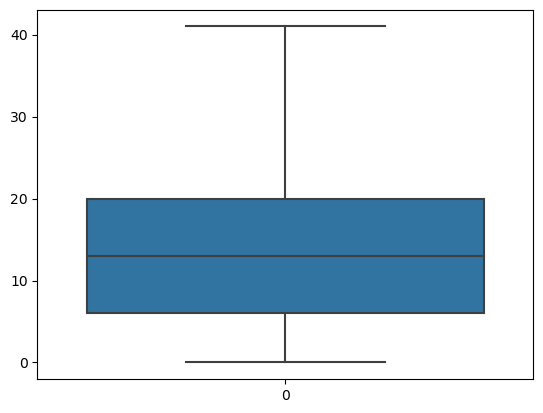

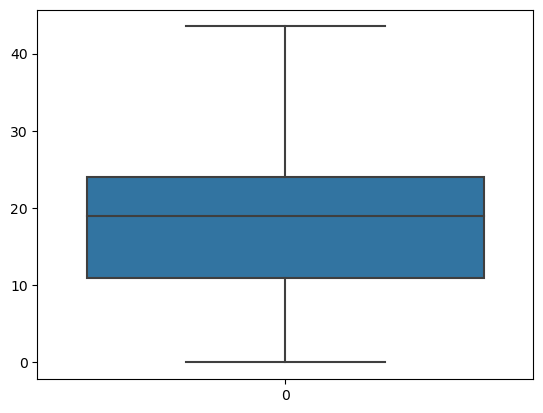

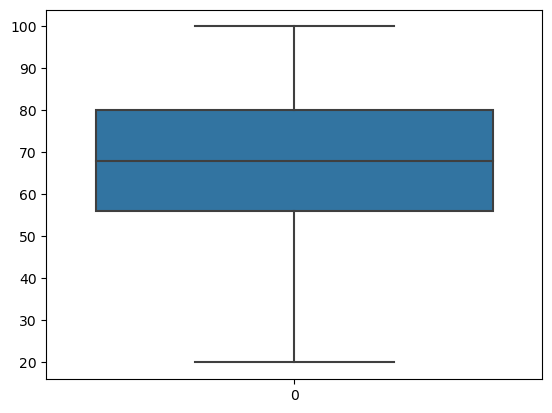

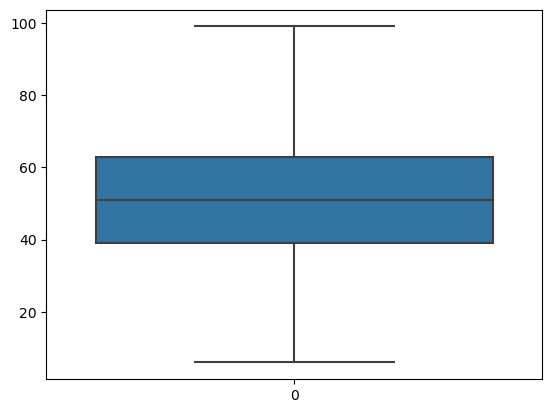

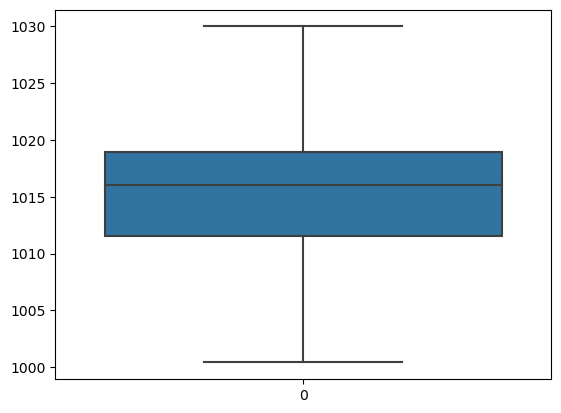

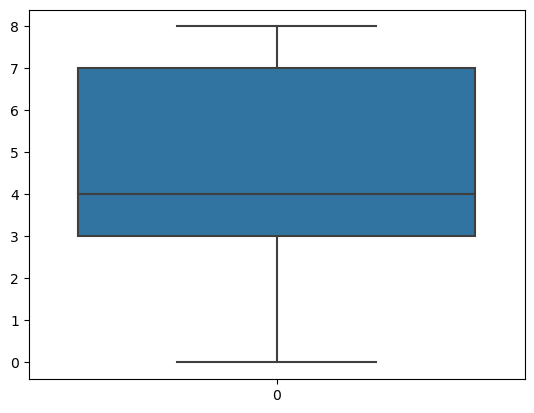

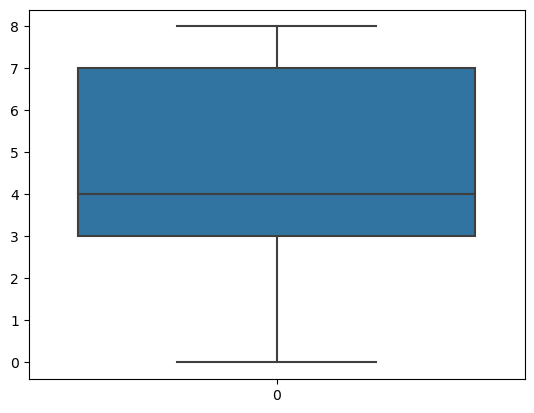

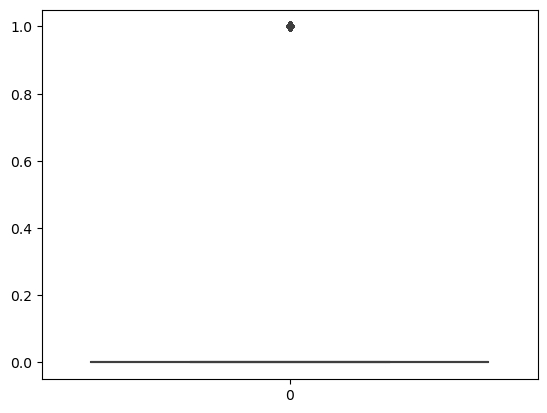

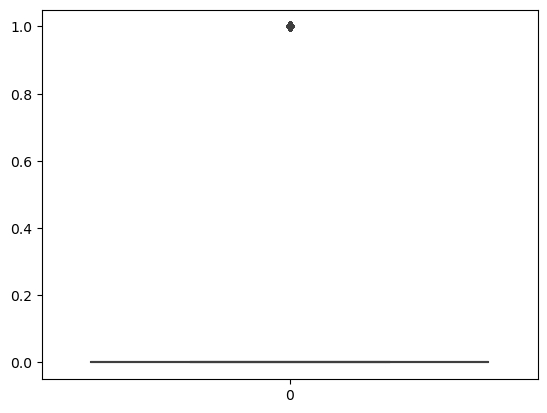

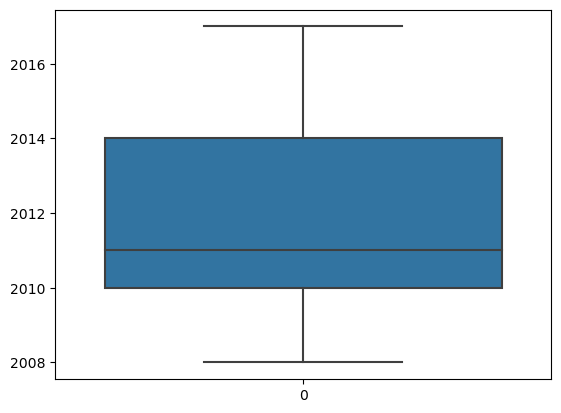

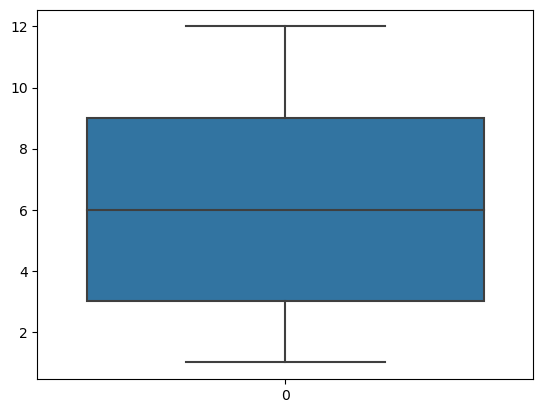

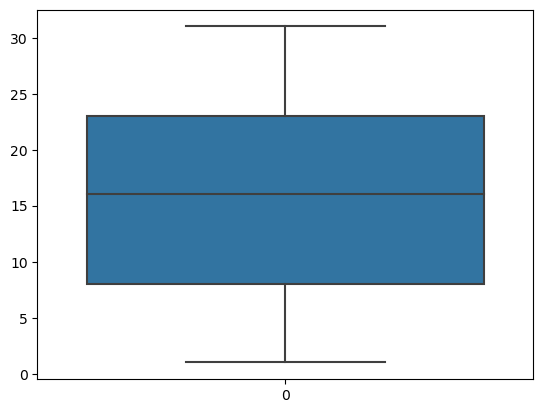

In [111]:
cont= [i for i in X.columns if X[i].dtypes!='O']
for i in cont:
    sns.boxplot(X[i])
    plt.show()

In [112]:
X[cont].skew()

MinTemp         -0.070098
MaxTemp          0.372256
Evaporation      0.042898
Sunshine        -0.822526
WindGustSpeed    0.556656
WindSpeed9am     0.743355
WindSpeed3pm     0.347722
Humidity9am     -0.235208
Humidity3pm      0.118933
Pressure3pm      0.015165
Cloud9am        -0.261462
Cloud3pm        -0.185359
RainToday        1.201947
RainTomorrow     1.229722
year             0.421639
month            0.054225
day              0.000577
dtype: float64

In [113]:
for i in cont:
    IQR= X[i].quantile(.75)-X[i].quantile(.25)
    lower=X[i].quantile(.25) - (1.5 * IQR)
    upper=X[i].quantile(.75) + (1.5 * IQR)
    X[i]=np.where(X[i]<lower,lower,X[i])
    X[i]=np.where(X[i]>upper,upper,X[i])
X[cont].skew()

MinTemp         -0.070098
MaxTemp          0.372256
Evaporation      0.042898
Sunshine        -0.822526
WindGustSpeed    0.556656
WindSpeed9am     0.743355
WindSpeed3pm     0.347722
Humidity9am     -0.235208
Humidity3pm      0.118933
Pressure3pm      0.015165
Cloud9am        -0.261462
Cloud3pm        -0.185359
RainToday        0.000000
RainTomorrow     0.000000
year             0.421639
month            0.054225
day              0.000577
dtype: float64

In [114]:
#Transformation
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in cont:
    trans=power_transform(data[cont])
    X[i]=sc.fit_transform(trans)
X.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,-0.630013,-0.630013,-0.630013,-0.630013,NNW,-0.630013,SE,NW,-0.630013,...,-0.630013,-0.630013,-0.630013,-0.630013,-0.630013,-0.630013,-0.630013,-0.630013,-0.630013,-0.630013
1,Albury,0.054150,0.054150,0.054150,0.054150,N,0.054150,SSE,ESE,0.054150,...,0.054150,0.054150,0.054150,0.054150,0.054150,0.054150,0.054150,0.054150,0.054150,0.054150
2,Albury,0.513327,0.513327,0.513327,0.513327,NNE,0.513327,NE,ENE,0.513327,...,0.513327,0.513327,0.513327,0.513327,0.513327,0.513327,0.513327,0.513327,0.513327,0.513327
3,Albury,0.513327,0.513327,0.513327,0.513327,W,0.513327,NNW,NNW,0.513327,...,0.513327,0.513327,0.513327,0.513327,0.513327,0.513327,0.513327,0.513327,0.513327,0.513327
4,Albury,0.182945,0.182945,0.182945,0.182945,ENE,0.182945,SSW,E,0.182945,...,0.182945,0.182945,0.182945,0.182945,0.182945,0.182945,0.182945,0.182945,0.182945,0.182945


In [115]:
#Encoding
X=pd.get_dummies(X,drop_first=True)
X.shape  , Y.shape

((8079, 73), (8079,))

In [147]:
#Machine LEarning
# Its a Regression problem coz output variable have continuous data, sales prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [150]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=23,test_size=.3)
LR.fit(x_train,y_train)

LinearRegression()

In [151]:
# Train Test Split / finding best random_state for my model
for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.2)
    LR.fit(x_train,y_train)
    train_pred=LR.predict(x_train)
    test_pred=LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2)==round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X'*50,'\n')

At random state  6 The model performance very well
At random state:  6
Test R2 score is:  0.95
Train R2 score is:  0.95
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  8 The model performance very well
At random state:  8
Test R2 score is:  0.95
Train R2 score is:  0.95
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  20 The model performance very well
At random state:  20
Test R2 score is:  0.95
Train R2 score is:  0.95
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  23 The model performance very well
At random state:  23
Test R2 score is:  0.95
Train R2 score is:  0.95
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  29 The model performance very well
At random state:  29
Test R2 score is:  0.95
Train R2 score is:  0.95
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  33 The model performance very well
At random state:  33
Test R2 score is:  0.95
Train R2 score is:  0.95
XXXXXXX

In [153]:
model = LinearRegression()
model.fit(x_train, y_train)
print('mean_absolute_error of ', model, 'model', mean_absolute_error(y_test, model.predict(x_test)))
print('mean_square_error of', model, 'model', mean_squared_error(y_test, model.predict(x_test)))


mean_absolute_error of  LinearRegression() model 0.1403573966630121
mean_square_error of LinearRegression() model 0.057433175029369905


In [154]:
#Hyper tuning of Random Forest
n_estimator= [200, 400, 600, 800, 1000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt','log2']  # mini no of features to create Decission Tree
max_depth=[10, 64, 118, 173, 227, 282, 336]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # mini no of sample rerquired to split node
min_samples_leaf= [1,3,4,6,7,9]  #mini no of sample required at each leaf node

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 400, 600, 800, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 64, 118, 173, 227, 282, 336],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4, 6, 7, 9]}

In [157]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
grid_search=RandomizedSearchCV(estimator=RFR_model,param_distributions=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 6, 7, 9],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   verbose=2)

In [158]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=282, max_features='log2', min_samples_leaf=3,
                      n_estimators=200)

In [160]:
GCV_pred=grid_search.best_estimator_.predict(x_test)

np.sqrt(mean_squared_error(y_test,GCV_pred))

0.3278217821656754

In [161]:
import joblib
joblib.dump(grid_search.best_estimator_,"Rainfall_Prediction_in_mm.pkl")

['Rainfall_Prediction_in_mm.pkl']

# Thank You